In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate
import random

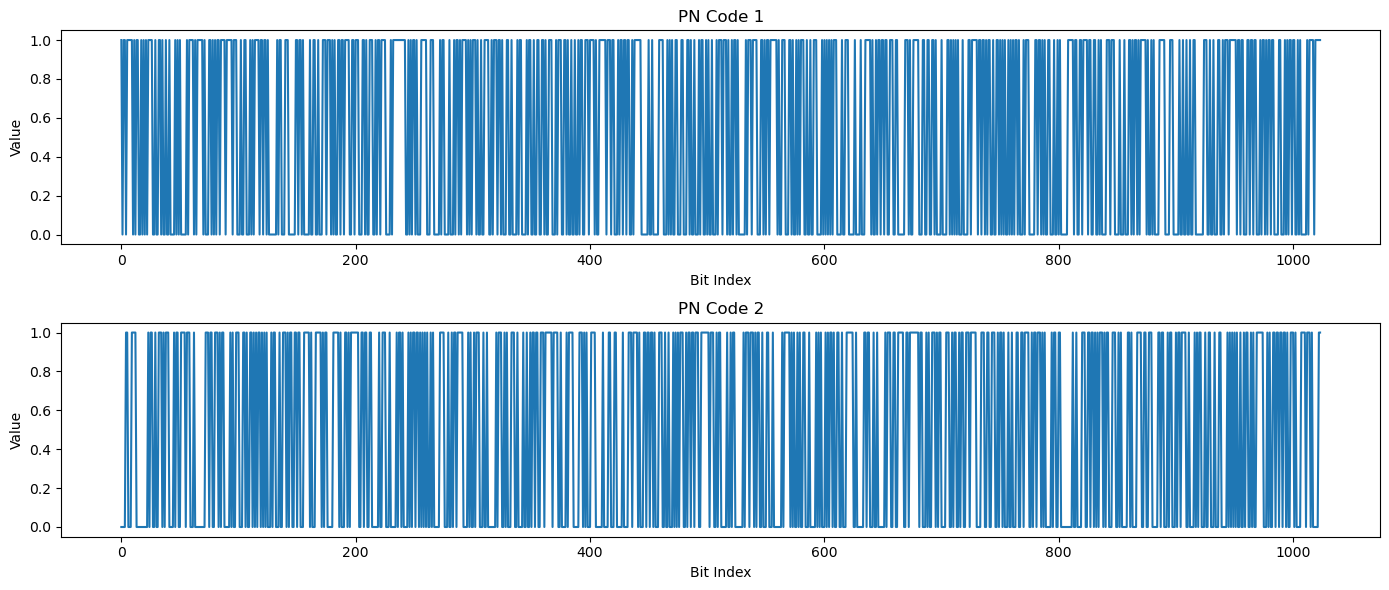

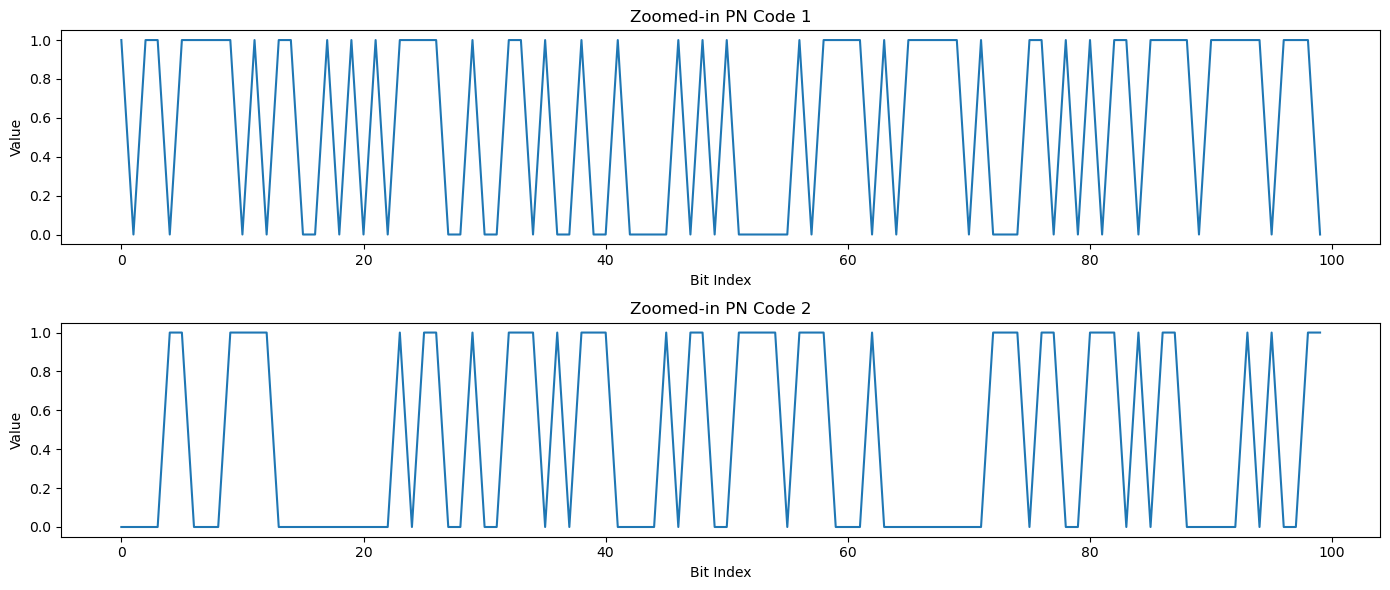

In [32]:
def generate_pn_code(length):
    """Generate PN code with values 0 and 1"""
    return np.random.choice([0, 1], size=length)

# Generate 32 PN codes, each 1024 bits long
pn_codes = [generate_pn_code(1024) for _ in range(32)]


pn_code_x = pn_codes[0]
pn_code_y = pn_codes[1]

plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(pn_code_x)
plt.title("PN Code 1")
plt.xlabel("Bit Index")
plt.ylabel("Value")

plt.subplot(2, 1, 2)
plt.plot(pn_code_y)
plt.title("PN Code 2")
plt.xlabel("Bit Index")
plt.ylabel("Value")

plt.tight_layout()
plt.show()



# Define the range to zoom in on
zoom_range = 100

# Plot the zoomed-in signals
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(pn_code_x[:zoom_range])
plt.title("Zoomed-in PN Code 1")
plt.xlabel("Bit Index")
plt.ylabel("Value")

plt.subplot(2, 1, 2)
plt.plot(pn_code_y[:zoom_range])
plt.title("Zoomed-in PN Code 2")
plt.xlabel("Bit Index")
plt.ylabel("Value")

plt.tight_layout()
plt.show()


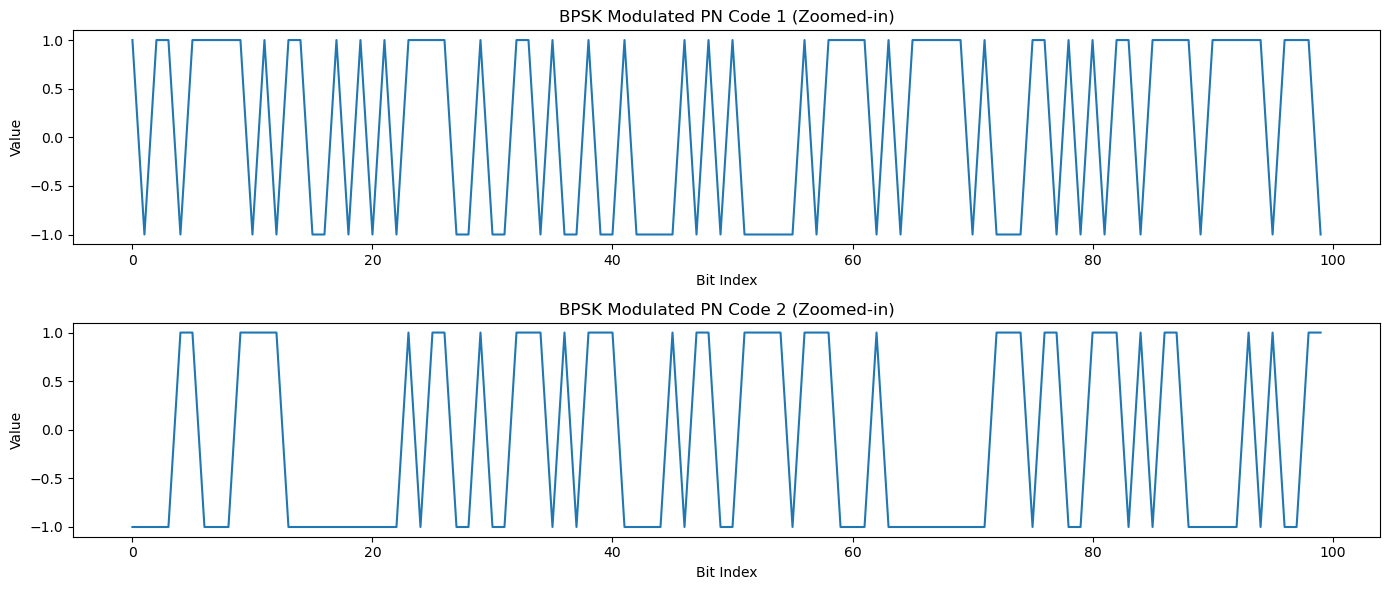

In [33]:
def bpsk_modulate(pn_code):
    """Modulate a PN code using BPSK, converting 0 to -1 and 1 to 1"""
    return np.where(np.array(pn_code) == 1, 1, -1)

# Modulate all 32 PN codes
bpsk_modulated_signals = [bpsk_modulate(code) for code in pn_codes]

# Plot the modulated signals for the first two PN codes (zoomed-in view for clarity)
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(bpsk_modulated_signals[0][:zoom_range])
plt.title("BPSK Modulated PN Code 1 (Zoomed-in)")
plt.xlabel("Bit Index")
plt.ylabel("Value")

plt.subplot(2, 1, 2)
plt.plot(bpsk_modulated_signals[1][:zoom_range])
plt.title("BPSK Modulated PN Code 2 (Zoomed-in)")
plt.xlabel("Bit Index")
plt.ylabel("Value")

plt.tight_layout()
plt.show()


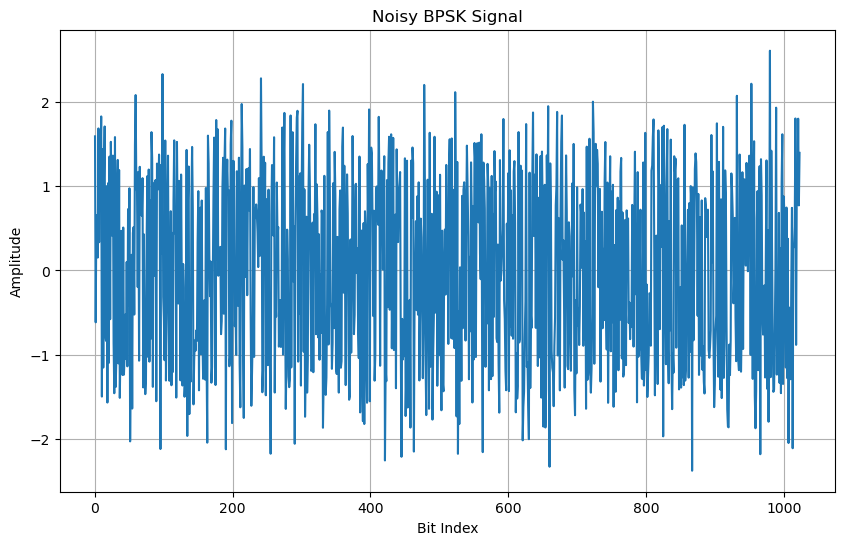

In [34]:
# Parameters
fs = 1024  # Sampling frequency
A_n = 0.5  # Noise amplitude

# Time vector for plotting (assuming bit duration is 1 sample)
t = np.arange(0, fs)

# Signal to transmit (one of the BPSK modulated signals)
x = bpsk_modulated_signals[0]

# Additive noise
noise = A_n * np.random.normal(size=fs)
noisy_x = x + noise

# Plotting the noisy signal
plt.figure(figsize=(10, 6))
plt.plot(t, noisy_x)
plt.title("Noisy BPSK Signal")
plt.xlabel("Bit Index")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


Best match index: 0
Highest correlation value: 1019.1604116749845


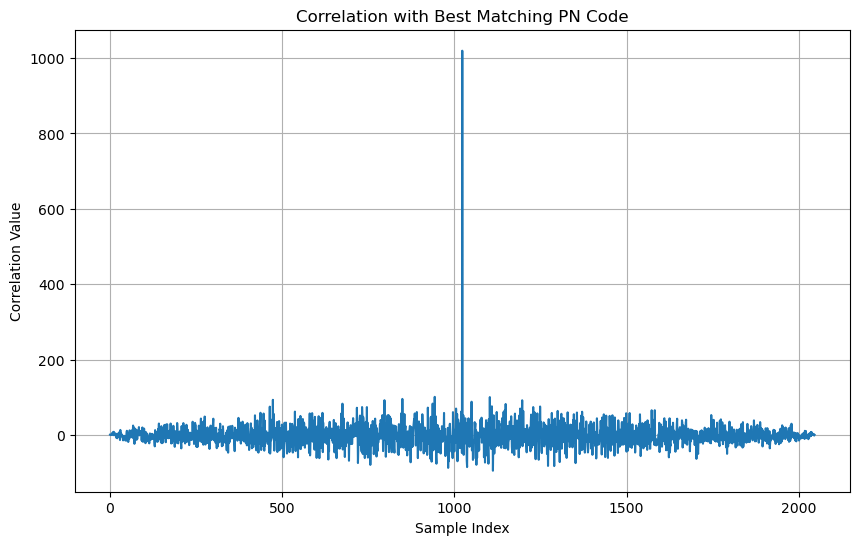

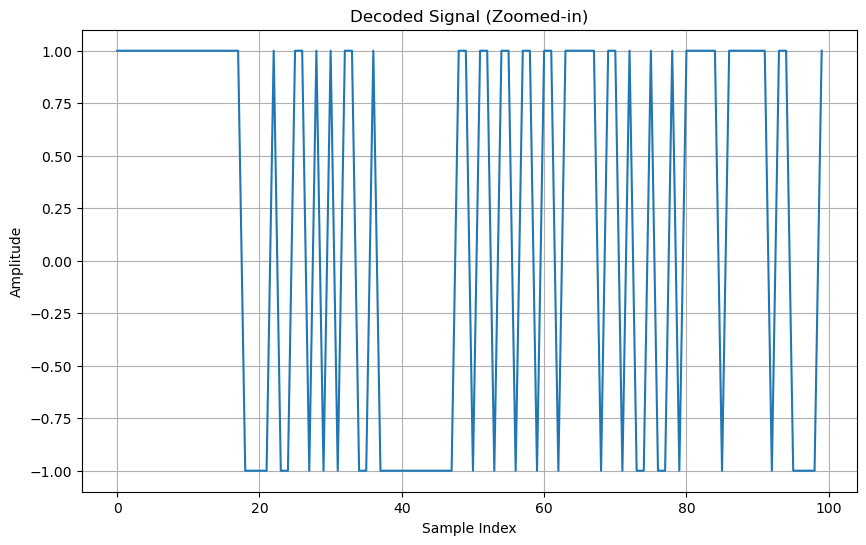

In [35]:
def correlate(received_signal, pn_code):
    """Compute the correlation between the received signal and a PN code"""
    modulated_pn_code = bpsk_modulate(pn_code)
    correlation = np.correlate(received_signal, modulated_pn_code, mode='full')
    return correlation

# Find the best matching PN code
correlations = [correlate(noisy_x, code) for code in pn_codes]
best_match_index = np.argmax([np.max(c) for c in correlations])
best_match_code = pn_codes[best_match_index]

print(f"Best match index: {best_match_index}")
print(f"Highest correlation value: {np.max(correlations[best_match_index])}")

# Decode the entire received signal using the best matching PN code
best_correlation = correlations[best_match_index]
decoded_signal = np.sign(best_correlation)  # Simplified example of decoding

# Correlation plot for the best matching PN code
plt.figure(figsize=(10, 6))
plt.plot(best_correlation)
plt.title("Correlation with Best Matching PN Code")
plt.xlabel("Sample Index")
plt.ylabel("Correlation Value")
plt.grid()
plt.show()

# Plot the decoded signal (zoomed-in view for clarity)
plt.figure(figsize=(10, 6))
plt.plot(decoded_signal[:zoom_range])
plt.title("Decoded Signal (Zoomed-in)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

In [36]:
# Select three random PN codes (simulated satellites)
random_satellites_indices = random.sample(range(32), 3)
random_satellites = [pn_codes[i] for i in random_satellites_indices]

print("Selected Satellites Indices for Location Calculation:", random_satellites_indices)

Selected Satellites Indices for Location Calculation: [26, 2, 21]


In [37]:
def calculate_location(sat_signals):
    return [sum(signal) for signal in sat_signals]  # Simplified example

location = calculate_location(random_satellites)
print("Simulated Location (Latitude, Longitude):", location)

Simulated Location (Latitude, Longitude): [485, 507, 515]


In [38]:
# Select four random PN codes (simulated satellites)
random_altitude_sat_indices = random.sample(range(32), 4)
random_altitude_sats = [pn_codes[i] for i in random_altitude_sat_indices]

print("Selected Satellites Indices for Altitude Calculation:", random_altitude_sat_indices)

Selected Satellites Indices for Altitude Calculation: [5, 2, 9, 21]


In [39]:
# Dummy function to simulate altitude calculation
def calculate_altitude(sat_signals):
    """Calculate altitude based on satellite signals (dummy implementation)"""
    return sum([sum(signal) for signal in sat_signals]) / len(sat_signals)  # Simplified example

# Calculate altitude using the selected satellites
altitude = calculate_altitude(random_altitude_sats)
print("Simulated Altitude:", altitude)

Simulated Altitude: 508.25
